In [1]:
!pwd
import sys
sys.executable

/c/Users/shingo/jupyter_notebook/tfgpu_py36_work/02_keras_py/experiment/01_code_test


'C:\\Users\\shingo\\Anaconda3\\envs\\tfgpu113\\python.exe'

# コードのテスト
## tf_define_model.py 関連の関数について
- ニューラルネットワーク構築する

In [2]:
import os, sys
current_dir = os.path.dirname(os.path.abspath("__file__"))
path = os.path.join(current_dir, '../../')
sys.path.append(path)
from model import tf_define_model as define_model
from model import tf_keras_visualize_cnn, tf_lr_finder, tf_multi_loss, tf_my_callback, tf_my_loss
%reload_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))# デフォルトは75%
%matplotlib inline

from tensorflow import keras

C:\Users\shingo\Anaconda3\envs\tfgpu113\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


multi_loss.py: loaded as module file


In [3]:
from tensorflow import keras
input_tensor = keras.layers.Input(shape=(224, 224, 3))
model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
print(model.input.shape)
print(model.input.shape[1])
print(model.input_shape)
print(model.input_shape[1])

(?, 224, 224, 3)
224
(None, 224, 224, 3)
224


In [4]:
model = define_model.get_imagenet_model(r'output_test\100x100_tf', 'InceptionV3', 100,100,3)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 49, 49, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 49, 49, 32)   0           batch_normalization_v1[0][0]     
__________________________________________________________________________________________________
conv2d_1 (

In [5]:
model = define_model.get_imagenet_model(r'output_test\100x100_tf', 'MobileNet', 100,100,3)
model.summary()

C:\Users\shingo\Anaconda3\envs\tfgpu113\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 101, 101, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 50, 50, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 50, 50, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 50, 50, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 50, 50, 32)        128       
__________

In [6]:
model = define_model.get_imagenet_model(r'output_test\100x100_tf', 'MobileNetV2', 100,100,3)
model.summary()

C:\Users\shingo\Anaconda3\envs\tfgpu113\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 101, 101, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 50, 50, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalizationV1) (None, 50, 50, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [7]:
model = define_model.get_imagenet_model(r'output_test\100x100_tf', 'NASNetLarge', 100,100,3)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 49, 49, 96)   2592        input_5[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalizationV1) (None, 49, 49, 96)   384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 49, 49, 96)   0           stem_bn1[0][0]                   
__________________________________________________________________________________________________
reduction_

__________________________________________________________________________________________________
reduction_left2_reduce_6 (MaxPo (None, 7, 7, 336)    0           reduction_pad_1_reduce_6[0][0]   
__________________________________________________________________________________________________
separable_conv_2_bn_reduction_r (None, 7, 7, 336)    1344        separable_conv_2_reduction_right2
__________________________________________________________________________________________________
separable_conv_2_reduction_righ (None, 7, 7, 336)    121296      activation_196[0][0]             
__________________________________________________________________________________________________
separable_conv_2_reduction_left (None, 7, 7, 336)    115920      activation_198[0][0]             
__________________________________________________________________________________________________
adjust_relu_1_7 (Activation)    (None, 13, 13, 1008) 0           normal_concat_4[0][0]            
__________

separable_conv_1_bn_normal_left (None, 4, 4, 672)    2688        separable_conv_1_normal_left5_15[
__________________________________________________________________________________________________
activation_308 (Activation)     (None, 4, 4, 672)    0           separable_conv_1_bn_normal_left1_
__________________________________________________________________________________________________
activation_310 (Activation)     (None, 4, 4, 672)    0           separable_conv_1_bn_normal_right1
__________________________________________________________________________________________________
activation_312 (Activation)     (None, 4, 4, 672)    0           separable_conv_1_bn_normal_left2_
__________________________________________________________________________________________________
activation_314 (Activation)     (None, 4, 4, 672)    0           separable_conv_1_bn_normal_right2
__________________________________________________________________________________________________
activation

In [8]:
model = define_model.get_EfficientNet_model(r'output_test\100x100_tf', input_shape=(100, 100, 3), efficientnet_num=7)
model.summary()

EfficientNetB7
input_shape: (100, 100, 3)
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 50, 50, 64)   1728        input_6[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalizationV1)  (None, 50, 50, 64)   256         stem_conv[0][0]                  
_____________________________________________________________________

block5b_se_squeeze (GlobalAvera (None, 1344)         0           block5b_activation[0][0]         
__________________________________________________________________________________________________
block5b_se_reshape (Reshape)    (None, 1, 1, 1344)   0           block5b_se_squeeze[0][0]         
__________________________________________________________________________________________________
block5b_se_reduce (Conv2D)      (None, 1, 1, 56)     75320       block5b_se_reshape[0][0]         
__________________________________________________________________________________________________
block5b_se_expand (Conv2D)      (None, 1, 1, 1344)   76608       block5b_se_reduce[0][0]          
__________________________________________________________________________________________________
block5b_se_excite (Multiply)    (None, 7, 7, 1344)   0           block5b_activation[0][0]         
                                                                 block5b_se_expand[0][0]          
__________

Total params: 64,097,680
Trainable params: 63,786,960
Non-trainable params: 310,720
__________________________________________________________________________________________________


In [9]:
num_classes = 10
activation = 'softmax'
retina_model = define_model.get_attention_ptmodel(num_classes, activation, base_pretrained_model=model, base_model_trainable=False)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
efficientnet-b7 (Model)         (None, 4, 4, 2560)   64097680    input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_94 (Batc (None, 4, 4, 2560)   10240       efficientnet-b7[1][0]            
__________________________________________________________________________________________________
dropout (Dropout)               (None, 4, 4, 2560)   0           batch_normalization_v1_94[0][0]  
__________________________________________________________________________________________________
conv2d_94 

Using TensorFlow backend.


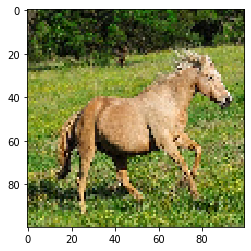

In [10]:
import keras

jpg = r'horse.jpg'
shape = [model.input_shape[1], model.input_shape[2], model.input_shape[3]]
img = keras.preprocessing.image.load_img(jpg, target_size=shape[:2])

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [11]:
from transformer import get_train_valid_test
jpg = r'horse.jpg'
X = get_train_valid_test.load_one_img(jpg, 100, 100)

ndimage.py: loaded as module file


In [12]:
retina_model.predict(X)

array([[0.15829833, 0.11591183, 0.06437884, 0.05481245, 0.13897638,
        0.06519061, 0.13823281, 0.0911212 , 0.10597214, 0.06710544]],
      dtype=float32)

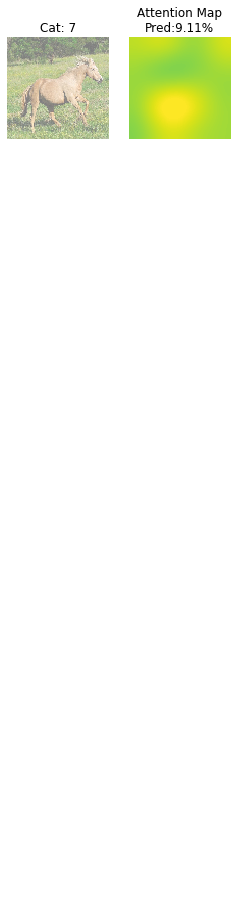

In [13]:
import numpy as np
y = np.array([7])
define_model.show_attention_layer(retina_model, X, y, output_dir=r'output_test\100x100_tf')

## 最低限の引数でモデルロード

In [14]:
import os, sys
current_dir = os.path.dirname(os.path.abspath("__file__"))
path = os.path.join(current_dir, '../../')
sys.path.append(path)
from model import define_model
%reload_ext autoreload
%autoreload 2

output_dir = r'output_test\100x100_tf'
img_rows,img_cols,channels = 100,100,3
num_classes = 10
chaice_model = 'EfficientNet'
choice_optim = 'adam'

# モデル作成
model, orig_model = define_model.get_fine_tuning_model(output_dir, img_rows, img_cols, channels, num_classes, chaice_model, efficientnet_num=7)
# オプティマイザ
optim = define_model.get_optimizers(choice_optim)
# モデルコンパイル
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

----- model_param -----
output_dir = output_test\100x100
img_rows img_cols channels = 100 100 3
num_classes = 10
choice_model trainable = EfficientNet all
fcs = []
fcpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 1
EfficientNetB7
input_shape: (100, 100, 3)
Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
----- FC_layers -----
---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.001 0.0 0.9 0.999


## モデル総当たり

In [15]:
output_dir = r'output_test\100x100_tf'
img_rows,img_cols,channels = 100,100,3
num_classes = 10
choice_optim = 'radam'

for chaice_model in ['VGG16', 'ResNet50', 'InceptionV3', 'Xception', 'InceptionResNetV2', 'MobileNet', 'MobileNetV2', 'NASNetLarge']:
    # モデル作成
    model, orig_model = define_model.get_fine_tuning_model(output_dir, img_rows, img_cols, channels, num_classes, chaice_model)
    # オプティマイザ
    optim = define_model.get_optimizers(choice_optim)
    # モデルコンパイル
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    print()

----- model_param -----
output_dir = output_test\100x100_tf
img_rows img_cols channels = 100 100 3
num_classes = 10
choice_model trainable = VGG16 all
fcs = []
fcpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 1
----- FC_layers -----
---- choice_optim = radam ----
radam_lr radam_decay beta_1 beta_2, amsgrad total_steps warmup_proportion min_lr = 0.001 0.0 0.9 0.999 False 0 0.1 0

----- model_param -----
output_dir = output_test\100x100_tf
img_rows img_cols channels = 100 100 3
num_classes = 10
choice_model trainable = ResNet50 all
fcs = []
fcpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 1


C:\Users\shingo\Anaconda3\envs\tfgpu113\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


----- FC_layers -----
---- choice_optim = radam ----
radam_lr radam_decay beta_1 beta_2, amsgrad total_steps warmup_proportion min_lr = 0.001 0.0 0.9 0.999 False 0 0.1 0

----- model_param -----
output_dir = output_test\100x100_tf
img_rows img_cols channels = 100 100 3
num_classes = 10
choice_model trainable = InceptionV3 all
fcs = []
fcpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 1


ValueError: Unknown initializer: GlorotUniform

In [17]:
keras.backend.clear_session()
output_dir = r'output_test\100x100_tf'
img_rows,img_cols,channels = 100,100,3
num_classes = 10
choice_optim = 'radam'

for chaice_model in ['EfficientNet']:
    # モデル作成
    model, orig_model = define_model.get_fine_tuning_model(output_dir, img_rows, img_cols, channels, num_classes, chaice_model, efficientnet_num=7)
    # オプティマイザ
    optim = define_model.get_optimizers(choice_optim)
    # モデルコンパイル
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    print()

----- model_param -----
output_dir = output_test\100x100_tf
img_rows img_cols channels = 100 100 3
num_classes = 10
choice_model trainable = EfficientNet all
fcs = []
fcpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 1
EfficientNetB7
input_shape: (100, 100, 3)
----- FC_layers -----
---- choice_optim = radam ----
radam_lr radam_decay beta_1 beta_2, amsgrad total_steps warmup_proportion min_lr = 0.001 0.0 0.9 0.999 False 0 0.1 0



## 全結合多層

In [18]:
keras.backend.clear_session()
output_dir = r'output_test\100x100_tf'
img_rows,img_cols,channels = 100,100,3
num_classes = 10
chaice_model = 'VGG16'
choice_optim = 'radam'

for fcs in [[100], [200, 100], [300, 200, 100]]:
    # モデル作成
    model, orig_model = define_model.get_fine_tuning_model(output_dir, img_rows, img_cols, channels, num_classes, chaice_model
                                                           , fcs=fcs)
    # オプティマイザ
    optim = define_model.get_optimizers(choice_optim)
    # モデルコンパイル
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    print()

----- model_param -----
output_dir = output_test\100x100_tf
img_rows img_cols channels = 100 100 3
num_classes = 10
choice_model trainable = VGG16 all
fcs = [100]
fcpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 1


C:\Users\shingo\Anaconda3\envs\tfgpu113\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


----- FC_layers -----
dence dropout is_add_batchnorm kernel_initializer l2_rate = 100 0.5 None he_normal 0.0001
---- choice_optim = radam ----
radam_lr radam_decay beta_1 beta_2, amsgrad total_steps warmup_proportion min_lr = 0.001 0.0 0.9 0.999 False 0 0.1 0

----- model_param -----
output_dir = output_test\100x100_tf
img_rows img_cols channels = 100 100 3
num_classes = 10
choice_model trainable = VGG16 all
fcs = [200, 100]
fcpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 1
----- FC_layers -----
dence dropout is_add_batchnorm kernel_initializer l2_rate = 200 0.5 None he_normal 0.0001
dence dropout is_add_batchnorm kernel_initializer l2_rate = 100 0.5 None he_normal 0.0001
---- choice_optim = radam ----
radam_lr radam_decay beta_1 beta_2, amsgrad total_steps warmup_proportion min_lr = 0.001 0.0 0.9 0.999 False 0 0.1 0

----- model_param -----
output_dir = output_test\100x100_tf
img_rows i

## attention層

In [19]:
keras.backend.clear_session()
output_dir = r'output_test\100x100_tf'
img_rows,img_cols,channels = 100,100,3
num_classes = 10
chaice_model = 'VGG16'
choice_optim = 'radam'

# モデル作成
model, orig_model = define_model.get_fine_tuning_model(output_dir, img_rows, img_cols, channels, num_classes, chaice_model
                                                       , fcpool='attention')
# オプティマイザ
optim = define_model.get_optimizers(choice_optim)
# モデルコンパイル
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
print()

----- model_param -----
output_dir = output_test\100x100_tf
img_rows img_cols channels = 100 100 3
num_classes = 10
choice_model trainable = VGG16 all
fcs = []
fcpool = attention
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 1
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 3, 3, 512)    14714688    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 3, 3, 512)    2048        vgg16[1][0]                      
__________

## マルチタスク

In [20]:
keras.backend.clear_session()
output_dir = r'output_test\100x100_tf'
img_rows,img_cols,channels = 100,100,3
num_classes = 10
chaice_model = 'VGG16'
choice_optim = 'radam'

# モデル作成
model, orig_model = define_model.get_fine_tuning_model(output_dir, img_rows, img_cols, channels, num_classes, chaice_model
                                                       , fcs=[512, 256]
                                                       , n_multitask=5, multitask_pred_n_node=num_classes)
# オプティマイザ
optim = define_model.get_optimizers(choice_optim)
# モデルコンパイル
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
print()
model.summary()

----- model_param -----
output_dir = output_test\100x100_tf
img_rows img_cols channels = 100 100 3
num_classes = 10
choice_model trainable = VGG16 all
fcs = [512, 256]
fcpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 5
----- FC_layers -----
dence dropout is_add_batchnorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0001
dence dropout is_add_batchnorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
dence dropout is_add_batchnorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0001
dence dropout is_add_batchnorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
dence dropout is_add_batchnorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0001
dence dropout is_add_batchnorm kernel_initializer l2_rate = 256 0.5 None he_normal 0.0001
dence dropout is_add_batchnorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.0001
dence dropout is_add_batchnorm

## オプティマイザ総当たり

In [21]:
for choice_optim in ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam', 'adabound', 'radam']:
    optim = define_model.get_optimizers(choice_optim)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    print()
    
for choice_optim in ['adabound', 'radam']:
    optim = define_model.get_optimizers(choice_optim)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    print()

---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.01 0.9 0.0 True

---- choice_optim = rmsprop ----
rmsprop_lr rmsprop_decay rmsprop_rho = 0.001 0.0 0.9

---- choice_optim = adagrad ----
adagrad_lr adagrad_decay = 0.01 0.0

---- choice_optim = adadelta ----
adadelta_lr adadelta_decay adadelta_rho = 1.0 0.0 0.95

---- choice_optim = adam ----
adam_lr adam_decay beta_1 beta_2 = 0.001 0.0 0.9 0.999

---- choice_optim = adamax ----
adamax_lr adamax_decay beta_1 beta_2 = 0.002 0.0 0.9 0.999

---- choice_optim = nadam ----
nadam_lr nadam_schedule_decay beta_1 beta_2 = 0.002 0.004 0.9 0.999

---- choice_optim = adabound ----
adabound_lr adabound_final_lr adabound_decay beta_1 beta_2, amsbound = 0.001 0.01 0.0 0.9 0.999 False

---- choice_optim = radam ----
radam_lr radam_decay beta_1 beta_2, amsgrad total_steps warmup_proportion min_lr = 0.001 0.0 0.9 0.999 False 0 0.1 0

---- choice_optim = adabound ----
adabound_lr adabound_final_lr adabound_decay beta_1 beta_2, am

## change_l2_softmax_net

In [22]:
keras.backend.clear_session()
output_dir = r'output_test\100x100_tf'
img_rows,img_cols,channels = 100,100,3
num_classes = 10
chaice_model = 'VGG16'
choice_optim = 'radam'

# モデル作成
model, orig_model = define_model.get_fine_tuning_model(output_dir, img_rows, img_cols, channels, num_classes, chaice_model
                                                       , fcpool='attention')
# オプティマイザ
optim = define_model.get_optimizers(choice_optim)
# モデルコンパイル
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
print()

model = define_model.change_l2_softmax_net(model)

----- model_param -----
output_dir = output_test\100x100_tf
img_rows img_cols channels = 100 100 3
num_classes = 10
choice_model trainable = VGG16 all
fcs = []
fcpool = attention
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 1
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 3, 3, 512)    14714688    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 3, 3, 512)    2048        vgg16[1][0]                      
__________

## print_model_summary

In [23]:
define_model.print_model_summary(model)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 3, 3, 512)    14714688    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 3, 3, 512)    2048        vgg16[1][0]                      
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 3, 3, 512)    0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_1 (